##Loading Packages and Path

In [4]:
# pip install prince

In [5]:
#Import

import pandas as pd
import numpy as np
import re
import gc
import sys
import math
from datetime import date


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmean
import random
from scipy.spatial import distance
import array

from sklearn.decomposition import PCA


# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


#import prince

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Main Path

path_main = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Raw Data/'
path_main_emp = path_main+'Employment/'
path_main_edu = path_main + 'Education/'
path_weekly_array = path_main_emp+'Employment History/Weekly Array/'
path_byJob = path_main_emp + 'Employment History/By Jobs/'
path_summary_array = path_main_emp+ 'Summary Measures/'

In [8]:
emp_hist_final_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Data Prep/Bikalpa/Temp_df/emp_hist_final.csv'
emp_hist_final = pd.read_csv(emp_hist_final_path)
emp_hist_final.drop('Unnamed: 0', inplace=True, axis=1)


#Creating the nine statistics 

Nine statistics to calculate 


1.   Fraction of jobs lasting less than 1 quarter
2.   Fraction of jobs lasting between 1 to 4 quarters 
3.   Fraction of jobs lasting between 5 to 8 quarters 
4.   Fraction of jobs lasting more than 8 quarters 
5.   Fraction of unemployment spells lasting less than 1 quarter
6.   Fraction of unemployment spells lasting between 1 an 4 quarters 
7.   Fraction of unemployment spells lasting between 4 to 8 quarters
8.   Total quarters of unemployment as a fraction of total number of quarters on record 
9.   Total number of different jobs as a fraction of the total number of quarters on record 







##Functions

In [ ]:
def intersection(lst1, lst2):
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3

def Diff(li1, li2):
    return list(set(li1) - set(li2))


def only_this_interval(q_minus1, q , q_plus1):
  not_before = Diff(q, q_minus1)
  not_after = Diff(q, q_plus1)
  only_this_q = intersection(not_before, not_after)
  return only_this_q #len(only_this)

def unpack_trackers(x_list, quarter):
  tracker_list = []
  for i in quarter:
    begin = 12*i
    end = 12*(i+1)
    tracker_all= list(set(x_list[begin:end]))
    trackers = [y for y in tracker_all if y>0 and y <100] #>= 999 are also considered unemployed for our purposes
    tracker_list = list(set(tracker_list + trackers))
  return tracker_list


In [ ]:
#Employment Stats 

def stat_emp(x_list, length):
  
  num_emp_less = []
  pre = [y for y in range(0,length)]
  current = [y for y in range(length,2*length) ]
  
  first_iteration = 1 

  for quarter in range(length, 167 - 2 * length ):  
    
    post = [y for y in range(max(current)+1, max(current)+1+length)]
    
    trackers_pre = unpack_trackers(x_list,  pre)
    trackers_current = unpack_trackers(x_list, current)
    trackers_post = unpack_trackers(x_list, post)
    
    #Job the first length not caputured 
    if  first_iteration == 1:
      num_emp_less = Diff(trackers_pre , trackers_current)
      first_iteration = 0 

    #if item in post already in num_emp_less, take it out
    num_emp_less = Diff(num_emp_less, trackers_post)

    if len(trackers_current) != 0: 
      a = only_this_interval( trackers_pre, trackers_current , trackers_post)
      if len(a) != 0: 
        for item in a:
          if item not in num_emp_less: num_emp_less.append(item)
          

    pre = [y for y in range(min(current)-(length-1),    min(current)+1) ] 
    current = [y for y in range(min(post)-(length-1),    min(post)+1) ] 

  return num_emp_less


def employment_stats(x, tracker_list):
  total_jobs = 0 
  total_jobs_pre1 =  list(set(x[tracker_list].tolist()))
  total_jobs_pre2 = [y for y in total_jobs_pre1 if y>0 and y <999]
  total_jobs = len(total_jobs_pre2)       #This way jobs lasting less than a month are mostly excluded 
  
  x_list =  x[tracker_list].tolist()

  stat_1_list = stat_emp(x_list, 1)
  stat_2_list = stat_emp(x_list, 4)
  stat_3_list = stat_emp(x_list, 8)


  if total_jobs!=0:
    if len(stat_1_list) <= len(stat_2_list) and len(stat_2_list) <= len(stat_3_list):
      stat_1 = len(stat_1_list) / total_jobs
      stat_2 = (len(stat_2_list) - len(stat_1_list))/total_jobs
      stat_3 = (len(stat_3_list) - len(stat_2_list)) / total_jobs
      stat_4 = 1 - (stat_1+stat_2+stat_3)

      x["stat1"] = stat_1
      x["stat2"] = stat_2
      x["stat3"] = stat_3
      x["stat4"] = stat_4
    else:
      print(x["ID"])
  
    
  x["stat9"] = total_jobs / 167                    
  return x 


In [ ]:
def sum_zero_before_1000(li,x):
  a = li.index(x)
  print(a)
  for i in range(0,a):
    if li[i] == 0: a = a -1
  print(a)
  return a  

test = [0, 0, 0, 0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1001, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1002, 1002, 1002, 1002, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1003, 1003, 3.0, 3.0, 3.0, 3.0, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1005, 1005, 1005, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print(sum_zero_before_1000(test,1000))

4
0
0


In [ ]:
#Unemployment Stats 

def last_occurance_1000(li, x):
    for i in range(0,len(li)):
        if li[i] == x and li[i+1]!=x:
            return i
    return "Error"

def sum_zero_before_1000(li,x):
  a = li.index(x)
  for i in range(0,a):
    if li[i] == 0: a = a -1
  return a   #This thing will return zero only if all numbers before x are zero



  
def impute_unemp_tracker(x_list):
  is_len_minus1 = 0 
  counter = 1000
  for item_index in range(0,len(x_list)):
    current = x_list[item_index]
    if current >999:
      if item_index == 0 or x_list[item_index -1 ] <999: 
        x_list[item_index] = counter
        counter = counter+1
      elif x_list[item_index -1 ] > 999:
        x_list[item_index] = x_list[item_index-1]
  
  

  if x_list[0] == 1000 or ((1000 in x_list) and sum_zero_before_1000(x_list,1000) == 0 ): 
    is_len_minus1 = 1
    for i in range(0,last_occurance_1000(x_list, 1000)+1):
      x_list[i] = 0

  
  return x_list , is_len_minus1




def stat_unemp(i, x_list,length):
  counter = 0

  if i>length-1 and i < len(x_list)-(2*length)+1 :    

    #Creating pre, current, post trackers for the interval 
    pre = [y for y in range(i-length, i)]
    trackers_pre = [x_list[y] for y in pre]
    current = [y for y in range(i, i+length)]
    trackers_current = [x_list[y] for y in current]
    post = [y for y in range(i+length, i+2*length)]
    trackers_post = [x_list[y] for y in post]


    if i == length:
      counter = 0 
      initial_iteration = trackers_pre + trackers_current

      j = len(initial_iteration)-1
      initial_current = initial_iteration[j-1]
      initial_after = initial_iteration[j]
      while j >=0:
        if initial_current > 999 and initial_after <999:  #end of spell   
         if j<length or initial_iteration[j-length] != initial_current: #spell is short enough  
            counter = counter +1
        initial_after = initial_current
        if j!=0: initial_current = initial_iteration[j-1]
        j -= 1
      
    else:
      counter = 0 

    only_this = only_this_interval(trackers_pre, trackers_current , trackers_post)
    unemp_trackers_current = [y for y in list(set(only_this)) if y > 999]


    if unemp_trackers_current != []:
      for tracker in unemp_trackers_current:
        indicator = (trackers_current[length-1] == tracker)
        counter = counter + indicator
       
  output = counter
  return output  


def thou_zero(y):
  if int(y) == 1000 or int(y) == 1003 : #or int(y) == 1007 :#or int(y) == 1005:
    return 0
  else: 
    return y



def unemployment_stats(x,tracker_list, tracker_list_job1):
  
  x_list = x[tracker_list_job1].tolist()
  x_list = [thou_zero(y) for y in x_list]
  x_list , is_len_minus1 = impute_unemp_tracker(x_list)
  
  unemp_stat1 = 0
  unemp_stat2 = 0
  unemp_stat3 = 0
  unemp_stat3_1 = 0
  unemp_stat8_drop = 0 
  total_unemp_spell = 0

  # print(x["ID"])
  # print(x_list)

  ##Find total unemployment spells , x =1 if x.index + 1 >999
  total_spells = 0
  for i in range(0,len(x_list)-1):
    if x_list[i] > 999 and x_list[i+1]<999 and x_list[i+1]>0  : total_spells = total_spells +1
    
    # Fraction of unemployment spells lasting less than 1 quarter
    if i > 0 and x_list[i]>999 and (x_list[i+1]<999 and x_list[i+1]>0) and (x_list[i-1]<999 and x_list[i-1]>0):
        unemp_stat1 = unemp_stat1 + 1

    # Fraction of unemployment spells lasting between 1 an 4 quarters
    unemp_stat2 = unemp_stat2 + stat_unemp(i,x_list,4)
      
    # Fraction of unemployment spells lasting between 4 to 8 quarters
    unemp_stat3 = unemp_stat3  + stat_unemp(i,x_list,8)

    # Fraction of unemployment spells lasting between 8 to 16 quarters
    unemp_stat3_1 = unemp_stat3_1  + stat_unemp(i,x_list,16)

    # Fraction of unemployment spells lasting between 8 to 16 quarters
    unemp_stat8_drop = unemp_stat8_drop  + stat_unemp(i,x_list,64)

  if is_len_minus1 ==1 :
    total_unemp_spell = max(x_list)-1000 
  else:
    total_unemp_spell = max(x_list)-999   
  if total_unemp_spell <0:   total_unemp_spell = 0
  #if total_unemp_spell <1 : print(str(x["ID"])+" "+str(total_unemp_spell)+ ",  Max_list = "+ str(max(x_list)) +", ump less 1 ")
  if total_unemp_spell > 0 :
    if unemp_stat1 <=unemp_stat2 and unemp_stat2<=unemp_stat3 and unemp_stat3<=unemp_stat3_1:
      if unemp_stat2 == 0 and unemp_stat3 == 0 and unemp_stat3 ==0 and unemp_stat3_1 ==0: #NO UNEMPLOYMENT SPELLS 
        x["stat5"] = 1
        x["stat7_2"] = 0
      else:
        x["stat5"] = (unemp_stat1 / total_unemp_spell)
        x["stat7_2"] = (total_unemp_spell-unemp_stat3_1)/total_unemp_spell

      x["stat6"] = (unemp_stat2 - unemp_stat1)/ total_unemp_spell
      x["stat7"] = (unemp_stat3 - unemp_stat2)/total_unemp_spell
      x["stat7_1"] = (unemp_stat3_1 - unemp_stat3)/total_unemp_spell
      x["stat8y_drop"] = (unemp_stat8_drop - unemp_stat3_1) / total_unemp_spell
    else: 
      print(str(x["ID"])+" "+str(total_unemp_spell)+ " " + str(unemp_stat1) + " "+ str(unemp_stat2) + " "+  str(unemp_stat3))
  elif total_unemp_spell == 0:
    x["stat5"] = 1
    x["stat6"] = 0
    x["stat7"] = 0
    x["stat7_1"] = 0
    x["stat7_2"] = 0
    x["stat8y_drop"] = 0


  sum_stat_8 = sum(is_unemployed(y) for y in x_list)
  x["stat8"] = sum_stat_8 / len(x_list)    
  return x 

def is_unemployed(y):
  output = 0 
  if y == 0 or y > 100:output = 1 
  return output




In [ ]:
def summary_stat(x, id_list, tracker_list ):
  x  = x[id_list + tracker_list]
  x = employment_stats(x, tracker_list)

  tracker_list_job1 = [y for y in tracker_list if y[15]=="1"]
  x = unemployment_stats(x,tracker_list, tracker_list_job1)
      
  return x

##Loading and Cleaning

In [ ]:

emp_hist_final1 = emp_hist_final #.sample(n=100)
id_list = ["ID", 	"SAMPLE_ID", 	"SAMPLE_RACE", 	"SAMPLE_SEX"]
job_tracker_list = [x for x in emp_hist_final1.columns.tolist() if x[:11] == "job_tracker"] 

emp_hist_stat = emp_hist_final1.apply(summary_stat, args= [id_list, job_tracker_list], axis =1)



In [ ]:
new_stats = ["stat1", 	"stat2" ,	"stat3", "stat4","stat5", 	"stat6" ,	"stat7", "stat7_1", "stat7_2","stat8" 	,"stat9" , "stat8y_drop"]
emp_hist_stat[new_stats].describe()

In [ ]:
emp_hist_stat = emp_hist_stat.dropna()
emp_hist_stat = emp_hist_stat.reset_index()
emp_hist_stat[new_stats].describe()

In [ ]:

#below are the ids that showed issues above
#there are 500 such ids which is 13.5 % of the data
#second iteration: there are 139 such ids which is 3 % of the data
id_to_drop = [29.0, 107.0, 119.0, 120.0, 160.0, 237.0, 267.0, 290.0, 297.0, 309.0, 346.0, 391.0, 469.0, 474.0, 589.0, 612.0, 622.0, 667.0, 678.0, 721.0, 812.0, 855.0, 880.0, 893.0, 903.0, 903.0, 951.0, 956.0, 977.0, 1024.0, 1053.0, 1087.0, 1088.0, 1147.0, 1193.0, 1221.0, 1259.0, 1394.0, 1433.0, 1502.0, 1529.0, 1533.0, 1597.0, 1599.0, 1622.0, 1637.0, 1649.0, 1666.0, 1725.0, 1733.0, 1770.0, 1820.0, 1823.0, 1842.0, 1975.0, 2077.0, 2093.0, 2113.0, 2134.0, 2164.0, 2229.0, 2247.0, 2283.0, 2347.0, 2381.0, 2415.0, 2462.0, 2482.0, 2512.0, 2551.0, 2569.0, 2572.0, 2654.0, 2658.0, 2732.0, 2755.0, 2851.0, 2868.0, 2874.0, 2885.0, 2920.0, 3088.0, 3195.0, 3275.0, 3280.0, 3287.0, 3359.0, 3416.0, 3428.0, 3473.0, 3486.0, 3546.0, 3570.0, 3685.0, 3700.0, 3809.0, 3888.0, 3902.0, 4070.0, 4108.0, 4265.0, 4326.0, 4370.0, 4474.0, 4498.0, 4537.0, 4580.0, 4656.0, 4673.0, 4687.0, 4748.0, 4838.0, 4840.0, 4855.0, 4872.0, 4892.0, 5050.0, 5060.0, 5197.0, 5219.0, 5260.0, 5337.0, 5387.0, 5395.0, 5459.0, 5465.0, 5479.0, 5514.0, 5540.0, 5554.0, 5653.0, 5697.0, 5712.0, 11779.0, 11805.0, 11961.0, 12054.0, 12070.0, 12116.0]
for id_d in id_to_drop:
  indexNames = emp_hist_stat[ emp_hist_stat["ID"] == id_d].index
  emp_hist_stat.drop(indexNames , inplace=True)


emp_hist_stat = emp_hist_stat.reset_index()
emp_hist_stat[new_stats].describe()



In [ ]:
# # #Saving 
# emp_hist_stat_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/emp_hist_stat.csv'
# with open(emp_hist_stat_path, 'w', encoding = 'utf-8-sig') as f:
#   emp_hist_stat.to_csv(f)

In [ ]:
# emp_hist_stat_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/emp_hist_stat.csv'
# emp_hist_stat = pd.read_csv(emp_hist_stat_path)
# emp_hist_stat.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
emp_hist_stat.drop('level_0', inplace=True, axis=1)
emp_hist_stat.drop('index', inplace=True, axis=1)

new_stats = ["stat1", 	"stat2" ,	"stat3", "stat4","stat5", 	"stat6" ,	"stat7", "stat7_1","stat7_2", "stat8" 	,"stat9"  ]
id_list = ["ID", 	"SAMPLE_ID", 	"SAMPLE_RACE", 	"SAMPLE_SEX"]



emp_hist_stat[new_stats].describe()

In [ ]:
emp_hist_stat[emp_hist_stat["stat7_2"] == 0 ][new_stats].describe()

emp_hist_stat = emp_hist_stat[emp_hist_stat["stat7_2"] == 0 ]

In [ ]:
new_stats = ["stat1", 	"stat2" ,	"stat3", "stat4","stat5", 	"stat6" ,	"stat7", "stat7_1" ,"stat7_2" , "stat8" 	,"stat9"  ]
id_list = ["ID", 	"SAMPLE_ID", 	"SAMPLE_RACE", 	"SAMPLE_SEX"]

emp_hist_stat = emp_hist_stat.reset_index()
if 'level_0' in list(emp_hist_stat.columns): emp_hist_stat.drop('level_0', inplace=True, axis=1)
if 'index' in list(emp_hist_stat.columns): emp_hist_stat.drop('index', inplace=True, axis=1)
emp_hist_stat

In [ ]:
emp_hist_stat[new_stats].describe()

In [ ]:
# # #Saving 
# emp_hist_stat_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/emp_hist_stat.csv'
# with open(emp_hist_stat_path, 'w', encoding = 'utf-8-sig') as f:
#   emp_hist_stat.to_csv(f)


# emp_hist_stat_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/emp_hist_stat.csv'
# emp_hist_stat = pd.read_csv(emp_hist_stat_path)
# emp_hist_stat.drop('Unnamed: 0', inplace=True, axis=1)

#K-means with three clusters

In [10]:
emp_hist_stat_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/emp_hist_stat.csv'
emp_hist_stat = pd.read_csv(emp_hist_stat_path)
emp_hist_stat.drop('Unnamed: 0', inplace=True, axis=1)
emp_hist_stat

,ID,SAMPLE_ID,SAMPLE_RACE,SAMPLE_SEX,job_tracker_job1-0003,job_tracker_job1-0007,job_tracker_job1-0011,job_tracker_job1-0015,job_tracker_job1-0020,job_tracker_job1-0024,...,stat3,stat4,stat5,stat6,stat7,stat7_1,stat7_2,stat8,stat8y_drop,stat9
0,2.0,5.0,3.0,2.0,1005.0,1005.0,1004.0,1005.0,1.0,1.0,...,0.250000,0.750000,1.000000,0.000000,0.000000,0.000000,0.0,0.286853,0.000000,0.023952
1,6.0,1.0,3.0,1.0,1005.0,1005.0,1005.0,1005.0,1.0,1.0,...,0.000000,0.454545,0.333333,0.444444,0.222222,0.000000,0.0,0.089641,0.000000,0.065868
2,8.0,6.0,3.0,2.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.000000,0.384615,0.200000,0.400000,0.200000,0.200000,0.0,0.095618,0.000000,0.077844
3,9.0,1.0,3.0,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.000000,0.600000,0.000000,0.333333,0.000000,0.666667,0.0,0.133466,0.000000,0.029940
4,14.0,5.0,3.0,2.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.230769,0.230769,0.250000,0.312500,0.312500,0.125000,0.0,0.217131,-0.125000,0.155689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,12124.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.250000,0.625000,1.000000,0.000000,0.000000,0.000000,0.0,0.256972,0.333333,0.047904
1506,12125.0,3.0,2.0,1.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.181818,0.272727,0.250000,0.375000,0.375000,0.000000,0.0,0.143426,0.000000,0.065868
1507,12128.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.222222,0.444444,0.000000,1.000000,0.000000,0.000000,0.0,0.027888,0.000000,0.053892
1508,12131.0,3.0,2.0,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.139442,1.000000,0.023952


In [11]:
new_stats = ["stat1", 	"stat2" ,	"stat3", "stat4","stat5", 	"stat6" ,	"stat7", "stat7_1" ,"stat7_2" , "stat8" 	,"stat9"  ]
id_list = ["ID", 	"SAMPLE_ID", 	"SAMPLE_RACE", 	"SAMPLE_SEX"]

In [12]:
# Convert DataFrame to matrix
mat = emp_hist_stat[new_stats].values

# Using sklearn
km = kmean(n_clusters=3, n_init = 100).fit(mat)

# # Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
results = pd.DataFrame([emp_hist_stat[new_stats].index,labels]).T
results.columns = ["Index", "Kmeans_3"]
results = results.drop(columns=['Index'])


emp_hist_stat_kmeans = pd.concat([emp_hist_stat, results], axis="columns")


value_count_kmeans_3 = emp_hist_stat_kmeans["Kmeans_3"].value_counts()/len(emp_hist_stat_kmeans.index) 
print(value_count_kmeans_3)
print(emp_hist_stat_kmeans[new_stats + ["Kmeans_3"]].groupby("Kmeans_3").mean())



1    0.492053
2    0.264901
0    0.243046
Name: Kmeans_3, dtype: float64
             stat1     stat2     stat3     stat4     stat5     stat6  \
Kmeans_3                                                               
0         0.106595  0.212111  0.109387  0.571908  0.866273  0.078917   
1         0.142606  0.298777  0.148806  0.409811  0.293924  0.286759   
2         0.095848  0.212721  0.131611  0.559821  0.208150  0.663334   

             stat7   stat7_1  stat7_2     stat8     stat9  
Kmeans_3                                                   
0         0.029967  0.024844      0.0  0.185416  0.046060  
1         0.230400  0.188917      0.0  0.125249  0.083792  
2         0.057186  0.071331      0.0  0.086116  0.060404  


In [13]:
emp_hist_stat_kmeans

,ID,SAMPLE_ID,SAMPLE_RACE,SAMPLE_SEX,job_tracker_job1-0003,job_tracker_job1-0007,job_tracker_job1-0011,job_tracker_job1-0015,job_tracker_job1-0020,job_tracker_job1-0024,...,stat4,stat5,stat6,stat7,stat7_1,stat7_2,stat8,stat8y_drop,stat9,Kmeans_3
0,2.0,5.0,3.0,2.0,1005.0,1005.0,1004.0,1005.0,1.0,1.0,...,0.750000,1.000000,0.000000,0.000000,0.000000,0.0,0.286853,0.000000,0.023952,0
1,6.0,1.0,3.0,1.0,1005.0,1005.0,1005.0,1005.0,1.0,1.0,...,0.454545,0.333333,0.444444,0.222222,0.000000,0.0,0.089641,0.000000,0.065868,1
2,8.0,6.0,3.0,2.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.384615,0.200000,0.400000,0.200000,0.200000,0.0,0.095618,0.000000,0.077844,1
3,9.0,1.0,3.0,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.600000,0.000000,0.333333,0.000000,0.666667,0.0,0.133466,0.000000,0.029940,1
4,14.0,5.0,3.0,2.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.230769,0.250000,0.312500,0.312500,0.125000,0.0,0.217131,-0.125000,0.155689,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,12124.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.625000,1.000000,0.000000,0.000000,0.000000,0.0,0.256972,0.333333,0.047904,0
1506,12125.0,3.0,2.0,1.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.272727,0.250000,0.375000,0.375000,0.000000,0.0,0.143426,0.000000,0.065868,1
1507,12128.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.444444,0.000000,1.000000,0.000000,0.000000,0.0,0.027888,0.000000,0.053892,2
1508,12131.0,3.0,2.0,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.139442,1.000000,0.023952,0


In [14]:
# tracker_list_job1 = [y for y in job_tracker_list if y[15]=="1"]

# #emp_hist_stat_kmeans[id_list+new_stats+["Kmeans_3"] +  tracker_list_job1]
# a = emp_hist_stat_kmeans[ emp_hist_stat_kmeans["Kmeans_3"]==0][new_stats + tracker_list_job1]

# print(new_stats)

# for i in range(0,10):
#   test = a.sample(n=1).values[0].tolist()
#   test_onlyvalues = test[11:]

#   test1 = [thou_zero(y) for y in test_onlyvalues]
#   test1 , is_len_minus1 = impute_unemp_tracker(test1)

#   print(test)
#   print(test[4:9])
#   print(test1)
#   print(max(test1))
#   print("....")


In [15]:
# #Saving 
# emp_hist_stat_kmeans_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/emp_hist_stat_kmeans.csv'
# with open(emp_hist_stat_kmeans_path, 'w', encoding = 'utf-8-sig') as f:
#   emp_hist_stat_kmeans[id_list+new_stats+["Kmeans_3"]].to_csv(f)

In [16]:
print(emp_hist_stat_kmeans.columns.tolist())

['ID', 'SAMPLE_ID', 'SAMPLE_RACE', 'SAMPLE_SEX', 'job_tracker_job1-0003', 'job_tracker_job1-0007', 'job_tracker_job1-0011', 'job_tracker_job1-0015', 'job_tracker_job1-0020', 'job_tracker_job1-0024', 'job_tracker_job1-0028', 'job_tracker_job1-0033', 'job_tracker_job1-0037', 'job_tracker_job1-0041', 'job_tracker_job1-0048', 'job_tracker_job1-0050', 'job_tracker_job1-0057', 'job_tracker_job1-0061', 'job_tracker_job1-0065', 'job_tracker_job1-0069', 'job_tracker_job1-0074', 'job_tracker_job1-0078', 'job_tracker_job1-0082', 'job_tracker_job1-0087', 'job_tracker_job1-0091', 'job_tracker_job1-0095', 'job_tracker_job1-0102', 'job_tracker_job1-0104', 'job_tracker_job1-0109', 'job_tracker_job1-0113', 'job_tracker_job1-0117', 'job_tracker_job1-0121', 'job_tracker_job1-0126', 'job_tracker_job1-0130', 'job_tracker_job1-0134', 'job_tracker_job1-0139', 'job_tracker_job1-0143', 'job_tracker_job1-0147', 'job_tracker_job1-0154', 'job_tracker_job1-0156', 'job_tracker_job1-0161', 'job_tracker_job1-0165', '

#K-means cross validation

In [ ]:
# #Break coord into 3 different groups 

# mat_list = mat.tolist()

# train = random.sample(mat_list, int(len(mat)/2))
# S1 = train[:int(len(train)/2)]
# S1_x = [item[0] for item in S1]
# S1_y = [item[1] for item in S1]

# S2 = train[int(len(train)/2):]
# S2_x = [item[0] for item in S2]
# S2_y = [item[1] for item in S2]

# S0 = [item for item in mat_list if item not in train]
# S0_x = [item[0] for item in S0]
# S0_y = [item[1] for item in S0]



# def get_cent_index(points, centroid_list):
#   x = min(centroid_list, key=lambda centroid: math.hypot(points[1]-centroid[1], points[0]-centroid[0]))
#   return centroid_list.index(x)

# def sort_cent1(S1_centroid, S2_centroid, sorted_S1):
  
#   y = [get_cent_index(points, S1_centroid) for points in S1_centroid]
#   return y

#   # y = S1_centroid[get_cent_index(points, S1_centroid)] for points in ..... ]

# diff_assign = list()


# #Total number of clusters to be checked
# max_cluster_check = 8

# for J in range(1,max_cluster_check+1):                 # J is the cluster number 
  
#   #Cluster S1 and S2 using J
#   S1_kmeans =  kmean(n_clusters=J, n_init=500).fit(S1)  
#   S2_kmeans =  kmean(n_clusters=J,n_init=500).fit(S2)

#   #Get their centroids and sort
#   #Sorting is done to ensure some ordering so that differencing will be easier 
#   S1_centroid = sorted(S1_kmeans.cluster_centers_.tolist())
#   S2_centroid = sorted(S2_kmeans.cluster_centers_.tolist())

#   S1_centroid = [S1_centroid[get_cent_index(points, S1_centroid)] for points in S2_centroid] #Might not be good for higher number of clusters 

#   #print(S1_centroid)

#   #Find the nearest centroid for each point in S0
#   #Using S1_centroid
#   S0_cluster_S1= [get_cent_index(points, S1_centroid) for points in S0  ] #S0
#   #Using S2_centroid 
#   S0_cluster_S2 = [get_cent_index(points, S2_centroid) for points in S0  ] #S0

#   #Count the number of points that have different cluster assignment
#   n_diff_assign = [(p - q)!=0 for p, q in zip(S0_cluster_S1, S0_cluster_S2)]
#   diff_assign.append(sum(n_diff_assign))
 
#   #print("Using " + str(J) + " clusters, there were " + str(sum(n_diff_assign)) + " different assignments")


# print(diff_assign)
# print([index+1 for index in range(max_cluster_check)])


# num_of_cluster = [index+1 for index in range(max_cluster_check)]
# plt.plot(num_of_cluster, diff_assign)


# for x,y in zip(num_of_cluster, diff_assign):

#     label = "{:}".format(y)
#     plt.annotate(label, # this is the text
#                  (x,y), # these are the coordinates to position the label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,4), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

# plt.xlabel('Number of Clusters')
# plt.ylabel('Cluster assignment mismatch between training sets')
# plt.title('Cross Validation to find optimum K mean Cluster Number ')
# plt.show()


#PCA

In [17]:
#Code for PCA

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(emp_hist_stat[new_stats].fillna(0))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9'])

print(pca.explained_variance_ratio_)

[3.94531821e-01 1.92798048e-01 1.58364044e-01 9.02266979e-02
 6.83898584e-02 5.55231715e-02 3.73250822e-02 2.84127667e-03
 4.17405622e-32]


In [18]:
# for i in range(0,5):
#   pca = PCA(n_components = 5)
#   principalComponents = pca.fit_transform(principalDf)
#   principalDf = pd.DataFrame(data = principalComponents
#               , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
#   print(pca.explained_variance_ratio_)

In [19]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,0.731806,-0.297448,0.007148,-0.015864,0.087819,-0.047799,0.215813,0.001780,2.781418e-15
1,-0.125325,0.084976,-0.096270,0.152239,-0.143337,0.131730,-0.085807,-0.010976,-1.011422e-15
2,-0.231695,0.145481,0.054436,-0.026939,0.084509,0.083530,-0.184959,-0.006897,1.153711e-15
3,-0.362891,-0.118663,0.385388,-0.496863,0.278686,0.077708,-0.192057,-0.027000,-1.046391e-16
4,-0.157095,0.350864,0.058999,0.099291,-0.031831,-0.030253,0.100603,0.062043,1.001844e-16
...,...,...,...,...,...,...,...,...,...
1505,0.715554,-0.148424,-0.034684,-0.013284,0.007349,-0.072914,0.179435,0.009423,-1.176931e-16
1506,-0.182912,0.269387,0.001832,0.232103,0.040408,-0.020310,0.014893,-0.028319,-2.232586e-17
1507,-0.679981,-0.123350,-0.425795,-0.008145,-0.119217,-0.046053,0.080366,-0.030477,-7.880917e-17
1508,0.739790,-0.537684,0.070159,0.022157,-0.002131,0.108789,-0.009187,0.019119,-5.735826e-17


#Shared Nearest Neighbor



##code

In [20]:

   
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph


def snn(X, neighbor_num, min_shared_neighbor_num):
    """Perform Shared Nearest Neighbor (SNN) clustering algorithm clustering.
    Parameters
    ----------
    X : array or sparse (CSR) matrix of shape (n_samples, n_features), or array of shape (n_samples, n_samples)
    A feature array
    neighbor_num : int
    K number of neighbors to consider for shared nearest neighbor similarity
    min_shared_neighbor_num : int
    Number of nearest neighbors that need to share two data points to be considered part of the same cluster
    """

    # for each data point, find their set of K nearest neighbors
    knn_graph = kneighbors_graph(X, n_neighbors=neighbor_num, include_self=False)
    neighbors = np.array([set(knn_graph[i].nonzero()[1]) for i in range(len(X))])

    # the distance matrix is computed as the complementary of the proportion of shared neighbors between each pair of data points
    snn_distance_matrix = np.asarray([[get_snn_distance(neighbors[i], neighbors[j]) for j in range(len(neighbors))] for i in range(len(neighbors))])

    # perform DBSCAN with the shared-neighbor distance criteria for density estimation
    dbscan = DBSCAN(min_samples=min_shared_neighbor_num, metric="precomputed")
    dbscan = dbscan.fit(snn_distance_matrix)
    return dbscan.core_sample_indices_, dbscan.labels_


def get_snn_similarity(x0, x1):
    """Calculate the shared-neighbor similarity of two sets of nearest neighbors, normalized by the maximum number of shared neighbors"""

    return len(x0.intersection(x1)) / len(x0)


def get_snn_distance(x0, x1):
    """Calculate the shared-neighbor distance of two sets of nearest neighbors, normalized by the maximum number of shared neighbors"""

    return 1 - get_snn_similarity(x0, x1)


class SNN(BaseEstimator, ClusterMixin):
    """Class for performing the Shared Nearest Neighbor (SNN) clustering algorithm.
    Parameters
    ----------
    neighbor_num : int
        K number of neighbors to consider for shared nearest neighbor similarity
    min_shared_neighbor_proportion : float [0, 1]
        Proportion of the K nearest neighbors that need to share two data points to be considered part of the same cluster
    Note: Naming conventions for attributes are based on the analogous ones of DBSCAN
    """

    def __init__(self, neighbor_num, min_shared_neighbor_proportion):

        """Constructor"""

        self.neighbor_num = neighbor_num
        self.min_shared_neighbor_num = round(neighbor_num * min_shared_neighbor_proportion)

    def fit(self, X):

        """Perform SNN clustering from features or distance matrix.
        Parameters
        ----------
        X : array or sparse (CSR) matrix of shape (n_samples, n_features), or array of shape (n_samples, n_samples)
            A feature array
        """

        clusters = snn(X, neighbor_num=self.neighbor_num, min_shared_neighbor_num=self.min_shared_neighbor_num)
        self.core_sample_indices_, self.labels_ = clusters
        if len(self.core_sample_indices_):
            # fix for scipy sparse indexing issue
            self.components_ = X[self.core_sample_indices_].copy()
        else:
            # no core samples
            self.components_ = np.empty((0, X.shape[1]))
        return self

    def fit_predict(self, X, y=None, sample_weight=None):
        """Performs clustering on X and returns cluster labels.
        Parameters
        ----------
        X : array or sparse (CSR) matrix of shape (n_samples, n_features), or \
                array of shape (n_samples, n_samples)
            A feature array, or array of distances between samples if
            ``metric='precomputed'``.
        sample_weight : array, shape (n_samples,), optional
            Weight of each sample, such that a sample with a weight of at least
            ``min_samples`` is by itself a core sample; a sample with negative
            weight may inhibit its eps-neighbor from being core.
            Note that weights are absolute, and default to 1.
        y : Ignored
        Returns
        -------
        y : ndarray, shape (n_samples,)
            cluster labels
        """
        self.fit(X)
        return self.labels_



In [21]:
    """Perform Shared Nearest Neighbor (SNN) clustering algorithm clustering.
    Parameters
    ----------
    X : array or sparse (CSR) matrix of shape (n_samples, n_features), or array of shape (n_samples, n_samples)
    A feature array
    neighbor_num : int
    K number of neighbors to consider for shared nearest neighbor similarity
    min_shared_neighbor_num : int
    Number of nearest neighbors that need to share two data points to be considered part of the same cluster
    """

'Perform Shared Nearest Neighbor (SNN) clustering algorithm clustering.\nParameters\n----------\nX : array or sparse (CSR) matrix of shape (n_samples, n_features), or array of shape (n_samples, n_samples)\nA feature array\nneighbor_num : int\nK number of neighbors to consider for shared nearest neighbor similarity\nmin_shared_neighbor_num : int\nNumber of nearest neighbors that need to share two data points to be considered part of the same cluster\n'

In [22]:
"""
Implimentation of Density-Based Clustering Validation "DBCV"
Citation:
Moulavi, Davoud, et al. "Density-based clustering validation."
Proceedings of the 2014 SIAM International Conference on Data Mining.
Society for Industrial and Applied Mathematics, 2014.
"""

import numpy as np
from scipy.spatial.distance import euclidean, cdist
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csgraph


def DBCV(X, labels, dist_function=euclidean):
    """
    Density Based clustering validation
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: cluster_validity (float)
        score in range[-1, 1] indicating validity of clustering assignments
    """
    graph = _mutual_reach_dist_graph(X, labels, dist_function)
    mst = _mutual_reach_dist_MST(graph)
    cluster_validity = _clustering_validity_index(mst, labels)
    return cluster_validity


def _core_dist(point, neighbors, dist_function):
    """
    Computes the core distance of a point.
    Core distance is the inverse density of an object.
    Args:
        point (np.array): array of dimensions (n_features,)
            point to compute core distance of
        neighbors (np.ndarray): array of dimensions (n_neighbors, n_features):
            array of all other points in object class
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: core_dist (float)
        inverse density of point
    """
    n_features = np.shape(point)[0]
    n_neighbors = np.shape(neighbors)[0]

    distance_vector = cdist(point.reshape(1, -1), neighbors)
    distance_vector = distance_vector[distance_vector != 0]
    numerator = ((1/distance_vector)**n_features).sum()
    core_dist = (numerator / (n_neighbors - 1)) ** (-1/n_features)
    return core_dist


def _mutual_reachability_dist(point_i, point_j, neighbors_i,
                              neighbors_j, dist_function):
    """.
    Computes the mutual reachability distance between points
    Args:
        point_i (np.array): array of dimensions (n_features,)
            point i to compare to point j
        point_j (np.array): array of dimensions (n_features,)
            point i to compare to point i
        neighbors_i (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point i
        neighbors_j (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point j
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: mutual_reachability (float)
        mutual reachability between points i and j
    """
    core_dist_i = _core_dist(point_i, neighbors_i, dist_function)
    core_dist_j = _core_dist(point_j, neighbors_j, dist_function)
    dist = dist_function(point_i, point_j)
    mutual_reachability = np.max([core_dist_i, core_dist_j, dist])
    return mutual_reachability


def _mutual_reach_dist_graph(X, labels, dist_function):
    """
    Computes the mutual reach distance complete graph.
    Graph of all pair-wise mutual reachability distances between points
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: graph (np.ndarray)
        array of dimensions (n_samples, n_samples)
        Graph of all pair-wise mutual reachability distances between points.
    """
    n_samples = np.shape(X)[0]
    graph = []
    counter = 0
    for row in range(n_samples):
        graph_row = []
        for col in range(n_samples):
            point_i = X[row]
            point_j = X[col]
            class_i = labels[row]
            class_j = labels[col]
            members_i = _get_label_members(X, labels, class_i)
            members_j = _get_label_members(X, labels, class_j)
            dist = _mutual_reachability_dist(point_i, point_j,
                                             members_i, members_j,
                                             dist_function)
            graph_row.append(dist)
        counter += 1
        graph.append(graph_row)
    graph = np.array(graph)
    return graph


def _mutual_reach_dist_MST(dist_tree):
    """
    Computes minimum spanning tree of the mutual reach distance complete graph
    Args:
        dist_tree (np.ndarray): array of dimensions (n_samples, n_samples)
            Graph of all pair-wise mutual reachability distances
            between points.
    Returns: minimum_spanning_tree (np.ndarray)
        array of dimensions (n_samples, n_samples)
        minimum spanning tree of all pair-wise mutual reachability
            distances between points.
    """
    mst = minimum_spanning_tree(dist_tree).toarray()
    return mst + np.transpose(mst)


def _cluster_density_sparseness(MST, labels, cluster):
    """
    Computes the cluster density sparseness, the minimum density
        within a cluster
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_density_sparseness (float)
        value corresponding to the minimum density within a cluster
    """
    indices = np.where(labels == cluster)[0]
    cluster_MST = MST[indices][:, indices]
    cluster_density_sparseness = np.max(cluster_MST)
    return cluster_density_sparseness


def _cluster_density_separation(MST, labels, cluster_i, cluster_j):
    """
    Computes the density separation between two clusters, the maximum
        density between clusters.
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster_i (int): cluster i of interest
        cluster_j (int): cluster j of interest
    Returns: density_separation (float):
        value corresponding to the maximum density between clusters
    """
    indices_i = np.where(labels == cluster_i)[0]
    indices_j = np.where(labels == cluster_j)[0]
    shortest_paths = csgraph.dijkstra(MST, indices=indices_i)
    relevant_paths = shortest_paths[:, indices_j]
    density_separation = np.min(relevant_paths)
    return density_separation


def _cluster_validity_index(MST, labels, cluster):
    """
    Computes the validity of a cluster (validity of assignmnets)
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_validity (float)
        value corresponding to the validity of cluster assignments
    """
    min_density_separation = np.inf
    for cluster_j in np.unique(labels):
        if cluster_j != cluster:
            cluster_density_separation = _cluster_density_separation(MST,
                                                                     labels,
                                                                     cluster,
                                                                     cluster_j)
            if cluster_density_separation < min_density_separation:
                min_density_separation = cluster_density_separation
    cluster_density_sparseness = _cluster_density_sparseness(MST,
                                                             labels,
                                                             cluster)
    numerator = min_density_separation - cluster_density_sparseness
    denominator = np.max([min_density_separation, cluster_density_sparseness])
    cluster_validity = numerator / denominator
    return cluster_validity


def _clustering_validity_index(MST, labels):
    """
    Computes the validity of all clustering assignments for a
    clustering algorithm
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
    Returns: validity_index (float):
        score in range[-1, 1] indicating validity of clustering assignments
    """
    n_samples = len(labels)
    validity_index = 0
    for label in np.unique(labels):
        fraction = np.sum(labels == label) / float(n_samples)
        cluster_validity = _cluster_validity_index(MST, labels, label)
        validity_index += fraction * cluster_validity
    return validity_index


def _get_label_members(X, labels, cluster):
    """
    Helper function to get samples of a specified cluster.
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: members (np.ndarray)
        array of dimensions (n_samples, n_features) of samples of the
        specified cluster.
    """
    indices = np.where(labels == cluster)[0]
    members = X[indices]
    return members

##Attaching SNN clusters

[0, 1, 2, 3, 4, -1]


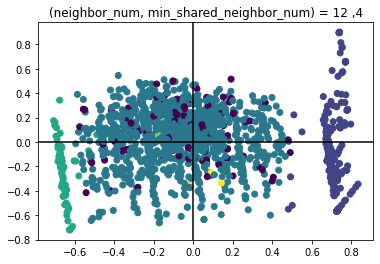

In [23]:
principalDf_sample = principalDf[["principal component 1", "principal component 2", "principal component 3" , "principal component 4",  "principal component 5" ]] #.sample(n=500)

x_total = [float(x[0]) for x in principalDf_sample.values ]
y_total = [float(x[1]) for x in principalDf_sample.values ]
z_total = [float(x[2]) for x in principalDf_sample.values ]
z2_total = [float(x[3]) for x in principalDf_sample.values ]

#print(principalDf_sample)
test = snn(principalDf_sample, 24,5)
print(list(set(test[1])))

test2 = emp_hist_stat_kmeans["Kmeans_3"].values.tolist()

plt.scatter(x_total,y_total, c = test[1])
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black") 

plt.title('(neighbor_num, min_shared_neighbor_num) = ' + str(12) + " ,"+ str(4) ) 
plt.show()

In [51]:
edu_emp_hist_kmean3_SNN_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/edu_emp_hist_kmean3_SNN.csv'
edu_emp_hist_kmean3_SNN = pd.read_csv(edu_emp_hist_kmean3_SNN_path)
edu_emp_hist_kmean3_SNN.drop('Unnamed: 0', inplace=True, axis=1)

In [56]:
k = list(edu_emp_hist_kmean3_SNN[edu_emp_hist_kmean3_SNN["week"] == 2139]["Kmeans_3"].values)
sn = list(edu_emp_hist_kmean3_SNN[edu_emp_hist_kmean3_SNN["week"] == 2139]["SNN"].values)
print(len(k))
print(k)
print(len(sn))
print(sn)


1510
[2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0,

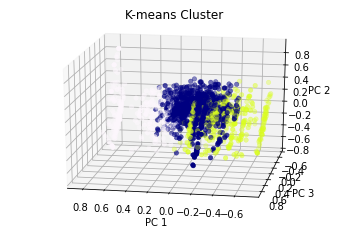

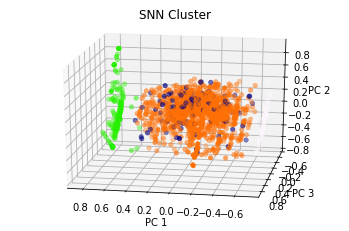

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_total, z_total, y_total, c = k, cmap='gist_ncar', linewidth=0.5)
ax.view_init(20, 100)
ax.set_title("K-means Cluster") 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 3')
ax.set_zlabel('PC 2')
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_total, z_total, y_total, c = sn, cmap='gist_ncar', linewidth=0.5)
ax.view_init(20, 100)
ax.set_title("SNN Cluster") 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 3')
ax.set_zlabel('PC 2')
plt.show()

In [69]:
principalDf_sample = principalDf[["principal component 1", "principal component 2", "principal component 3" , "principal component 4",  "principal component 5" ]] #.sample(n=500)

x_total = [float(x[0]) for x in principalDf_sample.values ]
y_total = [float(x[1]) for x in principalDf_sample.values ]
z_total = [float(x[2]) for x in principalDf_sample.values ]
z2_total = [float(x[3]) for x in principalDf_sample.values ]

#print(principalDf_sample)
test = snn(principalDf_sample, 24,5)

# # Get SNN cluster assignment labels
labels_SNN = test[1]

labels_SNN_fixed = [2 if (item == 2 or item == 3 or item == 4) else item for item in labels_SNN]

# Format results as a DataFrame
results_SNN = pd.DataFrame([emp_hist_stat[new_stats].index,labels_SNN_fixed]).T
results_SNN.columns = ["Index", "SNN"]
results_SNN = results_SNN.drop(columns=['Index'])



emp_hist_stat_kmeans_SNN = pd.concat([emp_hist_stat_kmeans, results_SNN], axis="columns")


value_count_SNN = emp_hist_stat_kmeans_SNN["SNN"].value_counts()/len(emp_hist_stat_kmeans_SNN.index) 
print(value_count_SNN)
print(emp_hist_stat_kmeans_SNN[new_stats + ["Kmeans_3"] + ["SNN"]].groupby("SNN").mean())


 1    0.720530
 0    0.145033
-1    0.078146
 2    0.056291
Name: SNN, dtype: float64
        stat1     stat2     stat3     stat4     stat5     stat6     stat7  \
SNN                                                                         
-1   0.163567  0.269598  0.144897  0.421938  0.340374  0.308862  0.193163   
 0   0.106643  0.207806  0.097367  0.588184  0.995728  0.001210  0.000000   
 1   0.123244  0.267363  0.140719  0.468674  0.329598  0.360983  0.166134   
 2   0.078479  0.196595  0.139165  0.585760  0.032185  0.916452  0.017792   

      stat7_1  stat7_2     stat8     stat9  Kmeans_3  
SNN                                                   
-1   0.157601      0.0  0.125380  0.082208  0.355932  
 0   0.003062      0.0  0.257272  0.031745  2.000000  
 1   0.143285      0.0  0.108877  0.075857  0.537684  
 2   0.033571      0.0  0.070096  0.048679  0.929412  


In [73]:
emp_hist_stat_kmeans_SNN

,ID,SAMPLE_ID,SAMPLE_RACE,SAMPLE_SEX,job_tracker_job1-0003,job_tracker_job1-0007,job_tracker_job1-0011,job_tracker_job1-0015,job_tracker_job1-0020,job_tracker_job1-0024,...,stat5,stat6,stat7,stat7_1,stat7_2,stat8,stat8y_drop,stat9,Kmeans_3,SNN
0,2.0,5.0,3.0,2.0,1005.0,1005.0,1004.0,1005.0,1.0,1.0,...,1.000000,0.000000,0.000000,0.000000,0.0,0.286853,0.000000,0.023952,2,0
1,6.0,1.0,3.0,1.0,1005.0,1005.0,1005.0,1005.0,1.0,1.0,...,0.333333,0.444444,0.222222,0.000000,0.0,0.089641,0.000000,0.065868,0,1
2,8.0,6.0,3.0,2.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.200000,0.400000,0.200000,0.200000,0.0,0.095618,0.000000,0.077844,0,1
3,9.0,1.0,3.0,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.000000,0.333333,0.000000,0.666667,0.0,0.133466,0.000000,0.029940,0,1
4,14.0,5.0,3.0,2.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,0.250000,0.312500,0.312500,0.125000,0.0,0.217131,-0.125000,0.155689,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,12124.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.000000,0.000000,0.000000,0.0,0.256972,0.333333,0.047904,2,0
1506,12125.0,3.0,2.0,1.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,...,0.250000,0.375000,0.375000,0.000000,0.0,0.143426,0.000000,0.065868,0,1
1507,12128.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,1.000000,0.000000,0.000000,0.0,0.027888,0.000000,0.053892,1,2
1508,12131.0,3.0,2.0,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.000000,0.000000,0.000000,0.000000,0.0,0.139442,1.000000,0.023952,2,0


[0 1 1 ... 2 0 1]
[0, 1, 2, 3, 4, -1]


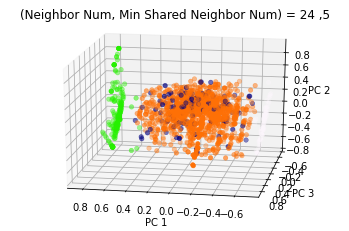

##testing

In [ ]:
#Things to do 
# 1) 3D plot for cross validation  .. done 
# 2) DVCV  ..
# 3) Regressions: Mincer, Multi-logistic 
# 4) Writing thing out in Latex 
# 5) 


[0, 1, 2, 3, 4, 5, 6, 7, -1]


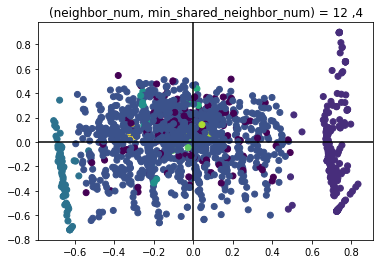

In [17]:
principalDf_sample = principalDf[["principal component 1", "principal component 2", "principal component 3" , "principal component 4",  "principal component 5" ]] #.sample(n=500)

x_total = [float(x[0]) for x in principalDf_sample.values ]
y_total = [float(x[1]) for x in principalDf_sample.values ]
z_total = [float(x[2]) for x in principalDf_sample.values ]
z2_total = [float(x[3]) for x in principalDf_sample.values ]

#print(principalDf_sample)
test = snn(principalDf_sample, 22, 5)
print(list(set(test[1])))


test2 = emp_hist_stat_kmeans["Kmeans_3"].values.tolist()

plt.scatter(x_total,y_total, c = test[1])
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black") 

plt.title('(neighbor_num, min_shared_neighbor_num) = ' + str(12) + " ,"+ str(4) ) 
plt.show()




    #24,5 yes

    #26,6 Yes


In [ ]:
loop_list = [[24,5],[26,6]]
angle_loop = [[0,0],[20,50],[40,100],[60,150], [40,180], [20,240],[0,280]]

for angle_i in range(0,len(angle_loop)):
  for num in loop_list:
    test = snn(principalDf_sample, num[0], num[1])
    print(num)
    print(angle_loop[angle_i])
    print(list(set(test[1])))
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(z_total, y_total, x_total, c=test[1], cmap='gist_ncar', linewidth=0.5)
    ax.view_init(angle_loop[angle_i][0], angle_loop[angle_i][1])
    ax.set_title('(Neighbor Num, Min Shared Neighbor Num) = ' + str(num[0]) + " ,"+ str(num[1]) ) 
    ax.set_xlabel('PC 3')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 1')
    plt.show()

  
# Use 24,5, both are almost the same
  

In [ ]:
print(list(set(test[1])))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1]


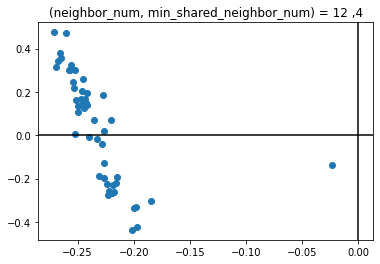

In [ ]:
principalDf1 = principalDf[principalDf["principal component 3"] > 0.6]

# principalDf1 = principalDf[principalDf["principal component 1"] > 0.53]
# principalDf1 = principalDf1[principalDf1["principal component 1"] < 0.7]                       
# df = pd.DataFrame(np.transpose(test), columns = ['Column_A'])
#principalDf1
test_concat = pd.concat([emp_hist_stat, results], axis="columns")
x_total = [x[0] for x in principalDf1.values ]
y_total = [x[1] for x in principalDf1.values ]

plt.scatter(x_total,y_total )

plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black") 

plt.title('(neighbor_num, min_shared_neighbor_num) = ' + str(12) + " ,"+ str(4) ) 
plt.show()



In [ ]:
test_concat1 = pd.concat([emp_hist_stat_kmeans, principalDf1], axis="columns")
test_concat1 = test_concat1.dropna()
test_concat1[new_stats].describe()

,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat7_1,stat7_2,stat8,stat9
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.0,51.000000,51.000000
mean,0.094766,0.186360,0.115354,0.603520,0.003922,0.0,0.463912,0.532166,0.0,0.094602,0.042973
std,0.121567,0.148786,0.101737,0.220705,0.028006,0.0,0.432570,0.433809,0.0,0.051586,0.022138
min,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.021912,0.005988
25%,0.000000,0.000000,0.000000,0.444444,0.000000,0.0,0.000000,0.000000,0.0,0.057769,0.029940
50%,0.000000,0.200000,0.133333,0.571429,0.000000,0.0,0.500000,0.500000,0.0,0.081673,0.035928
75%,0.166667,0.281746,0.200000,0.800000,0.000000,0.0,1.000000,1.000000,0.0,0.119522,0.053892
max,0.428571,0.500000,0.363636,1.000000,0.200000,0.0,1.000000,1.000000,0.0,0.274900,0.107784


In [ ]:
print(test_concat1.columns.tolist())

['ID', 'SAMPLE_ID', 'SAMPLE_RACE', 'SAMPLE_SEX', 'job_tracker_job1-0003', 'job_tracker_job1-0007', 'job_tracker_job1-0011', 'job_tracker_job1-0015', 'job_tracker_job1-0020', 'job_tracker_job1-0024', 'job_tracker_job1-0028', 'job_tracker_job1-0033', 'job_tracker_job1-0037', 'job_tracker_job1-0041', 'job_tracker_job1-0048', 'job_tracker_job1-0050', 'job_tracker_job1-0057', 'job_tracker_job1-0061', 'job_tracker_job1-0065', 'job_tracker_job1-0069', 'job_tracker_job1-0074', 'job_tracker_job1-0078', 'job_tracker_job1-0082', 'job_tracker_job1-0087', 'job_tracker_job1-0091', 'job_tracker_job1-0095', 'job_tracker_job1-0102', 'job_tracker_job1-0104', 'job_tracker_job1-0109', 'job_tracker_job1-0113', 'job_tracker_job1-0117', 'job_tracker_job1-0121', 'job_tracker_job1-0126', 'job_tracker_job1-0130', 'job_tracker_job1-0134', 'job_tracker_job1-0139', 'job_tracker_job1-0143', 'job_tracker_job1-0147', 'job_tracker_job1-0154', 'job_tracker_job1-0156', 'job_tracker_job1-0161', 'job_tracker_job1-0165', '

In [ ]:
v_list = test_concat1.columns.tolist()
v_list.remove(0)
v_list.remove(1)

job1_test = [x for x in v_list if x in id_list or x[0] == "s" or x[0]=="K" or x[-6]== "1"]


# print(job1_test)
# print(test_concat1[job1_test].values.tolist()[1])
# print(test_concat1[job1_test].values.tolist()[14])
# print(test_concat1[job1_test].values.tolist()[49])
# print(test_concat1[job1_test].values.tolist()[75])
# print(test_concat1[job1_test].values.tolist()[99])
# print(test_concat1[job1_test].values.tolist()[114])
# print(test_concat1[job1_test].values.tolist()[160])
# print(test_concat1[job1_test].values.tolist()[211])


In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax[0,0].scatter(x_total, y_total, z_total, c=z_total, cmap='viridis', linewidth=0.5)
# ax.view_init(i, 35)

In [ ]:


# optimal_score = -1 
# optimal_score_i = 1
# optimal_score_j = 1
# principalDf_sample_index_reset =  principalDf_sample.reset_index()
# for i in range(15,18):
#   for j in range(9,12):
#     SNN_clustering = snn(principalDf_sample, i, j)
#     a = pd.concat([principalDf_sample_index_reset , pd.DataFrame({'SNN_cluster_no':list(SNN_clustering[1])})],axis = "columns")
#     cv_score = DBCV(a.to_numpy(), a["SNN_cluster_no"].to_numpy(), dist_function=euclidean)
#     print(str(cv_score) + ", i="+ str(i) + ", j=" + str(j))
#     if cv_score > optimal_score: 
#       optimal_score = cv_score
#       optimal_score_i = i
#       optimal_score_j = j

# print(str(optimal_score ) + " " + str(optimal_score_i ) + " " + str(optimal_score_j ))


In [ ]:
pc_list = ["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5"]

x_total = [x[0] for x in principalDf_sample[pc_list].values ]
y_total = [x[1] for x in principalDf_sample[pc_list].values ]
for i in range(25,30):
  for j in range(1,10):
    test = snn(principalDf_sample[pc_list], i, j)
    plt.scatter(x_total,y_total, c = test[1])

    plt.axvline(x=0, c="black")
    plt.axhline(y=0, c="black") 

    plt.title('(neighbor_num, min_shared_neighbor_num) = ' + str(i) + " ,"+ str(j) ) 
    plt.show()



In [ ]:
# x_total = [x[0] for x in principalDf_sample.values ]
# y_total = [x[1] for x in principalDf_sample.values ]
# for i in range(2,25):
#   for j in range(2,25):
#     test = snn(principalDf_sample, i, j)
#     plt.scatter(x_total,y_total, c = test[1])

#     plt.axvline(x=0, c="black")
#     plt.axhline(y=0, c="black") 

#     plt.title('(neighbor_num, min_shared_neighbor_num) = ' + str(i) + " ,"+ str(j) ) 
#     plt.show()

    

In [ ]:
#test_concat[id_list+new_stats][]

In [ ]:
emp_hist_stat[id_list+new_stats]

In [ ]:


test_concat = pd.concat([emp_hist_stat, results], axis="columns")
x_total = [x["stat5"] for x in test_concat.values ]
y_total = [x["stat7"] for x in test_concat.values ]
    

plt.scatter(x_total,y_total)

plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black") 

plt.title('(neighbor_num, min_shared_neighbor_num) = ' + str(12) + " ,"+ str(4) ) 
plt.show()

In [ ]:
test_concat["ID"].values.tolist()

In [ ]:
#Saving 
test_path= '/content/drive/MyDrive/Alpha_beta_gamma/test.csv'
with open(test_path, 'w', encoding = 'utf-8-sig') as f:
   test_concat.to_csv(f)

#Putting in time series

In [74]:
#Putting this in time series 
edu_emp_hist_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Data Prep/Bikalpa/Temp_df/edu_emp_hist.csv'
edu_emp_hist = pd.read_csv(edu_emp_hist_path)
edu_emp_hist.drop('Unnamed: 0', inplace=True, axis=1)
edu_emp_hist

,ID,SAMPLE_ID,SAMPLE_RACE,SAMPLE_SEX,week,hourly_wage_job1,hourly_wage_job2,hourly_wage_job3,hourly_wage_job4,job_tracker_job1,job_tracker_job2,job_tracker_job3,job_tracker_job4,hours_worked_job1,hours_worked_job2,hours_worked_job3,hours_worked_job4,year,Highest_Grade_Completed,HSchoolC_dummy
0,2,5,3,2,57,1156.0,-10.0,-10.0,-10.0,1,0,0,0,35,-10,-10,-10,1979,9,0
1,2,5,3,2,61,1209.0,-10.0,-10.0,-10.0,1,0,0,0,35,-10,-10,-10,1979,9,0
2,2,5,3,2,65,1209.0,-10.0,-10.0,-10.0,1,0,0,0,35,-10,-10,-10,1979,9,0
3,2,5,3,2,69,1209.0,-10.0,-10.0,-10.0,1,0,0,0,35,-10,-10,-10,1979,9,0
4,2,5,3,2,74,1209.0,-10.0,-10.0,-10.0,1,0,0,0,35,-10,-10,-10,1979,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079835,12140,5,3,2,2122,-10.0,-10.0,-10.0,-10.0,1005,1005,1005,1005,-10,-10,-10,-10,2018,13,1
2079836,12140,5,3,2,2126,-10.0,-10.0,-10.0,-10.0,1005,1005,1005,1005,-10,-10,-10,-10,2018,13,1
2079837,12140,5,3,2,2130,-10.0,-10.0,-10.0,-10.0,1000,1000,1000,1000,-10,-10,-10,-10,2018,13,1
2079838,12140,5,3,2,2137,-10.0,-10.0,-10.0,-10.0,1000,1000,1000,1000,-10,-10,-10,-10,2018,13,1


In [76]:
edu_emp_hist_kmean3_SNN = pd.merge(edu_emp_hist,emp_hist_stat_kmeans_SNN[id_list+new_stats+["Kmeans_3","SNN"]], on =  id_list, how = "left" )


In [77]:
#Date of birth 
path_main = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Raw Data/'
path_DOB = path_main + "DOB.csv"
DOB = pd.read_csv(path_DOB)
DOB.rename(columns = {"R0000100": "ID", 	"R0173600": "SAMPLE_ID" , 	"R0214700": "SAMPLE_RACE" ,	"R0214800":"SAMPLE_SEX" ,	"R0410100":"DOB_month",	"R0410300":"DOB_year"}, inplace = True)

edu_emp_hist_kmean3_SNN = pd.merge(edu_emp_hist_kmean3_SNN , DOB ,on= id_list ,how='left')


In [ ]:
#Week to Year 
WeekToYear_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/Week_to_year.csv'
WeekToYear = pd.read_csv(WeekToYear_path)
WeekToYear['week'] = WeekToYear['Week']
WeekToYear.drop('Week', inplace=True, axis=1)

edu_emp_hist_kmean3_SNN = pd.merge(edu_emp_hist_kmean3_SNN , WeekToYear ,on= "week" ,how='left')
edu_emp_hist_kmean3_SNN

In [79]:
edu_emp_hist_kmean3_SNN = edu_emp_hist_kmean3_SNN.dropna()
edu_emp_hist_kmean3_SNN

,ID,SAMPLE_ID,SAMPLE_RACE,SAMPLE_SEX,week,hourly_wage_job1,hourly_wage_job2,hourly_wage_job3,hourly_wage_job4,job_tracker_job1,...,stat7,stat7_1,stat7_2,stat8,stat9,Kmeans_3,SNN,DOB_month,DOB_year,Year
0,2,5,3,2,57,1156.0,-10.0,-10.0,-10.0,1,...,0.0,0.00,0.0,0.286853,0.023952,2.0,0.0,1,59,1979
1,2,5,3,2,61,1209.0,-10.0,-10.0,-10.0,1,...,0.0,0.00,0.0,0.286853,0.023952,2.0,0.0,1,59,1979
2,2,5,3,2,65,1209.0,-10.0,-10.0,-10.0,1,...,0.0,0.00,0.0,0.286853,0.023952,2.0,0.0,1,59,1979
3,2,5,3,2,69,1209.0,-10.0,-10.0,-10.0,1,...,0.0,0.00,0.0,0.286853,0.023952,2.0,0.0,1,59,1979
4,2,5,3,2,74,1209.0,-10.0,-10.0,-10.0,1,...,0.0,0.00,0.0,0.286853,0.023952,2.0,0.0,1,59,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077915,12135,5,3,2,2122,1406.0,-10.0,-10.0,-10.0,6,...,0.0,0.25,0.0,0.071713,0.035928,2.0,1.0,8,61,2018
2077916,12135,5,3,2,2126,1406.0,-10.0,-10.0,-10.0,6,...,0.0,0.25,0.0,0.071713,0.035928,2.0,1.0,8,61,2018
2077917,12135,5,3,2,2130,1406.0,-10.0,-10.0,-10.0,6,...,0.0,0.25,0.0,0.071713,0.035928,2.0,1.0,8,61,2018
2077918,12135,5,3,2,2137,-10.0,-10.0,-10.0,-10.0,1000,...,0.0,0.25,0.0,0.071713,0.035928,2.0,1.0,8,61,2018


In [80]:
#Saving 
edu_emp_hist_kmean3_SNN_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/edu_emp_hist_kmean3_SNN.csv'
with open(edu_emp_hist_kmean3_SNN_path, 'w', encoding = 'utf-8-sig') as f:
  edu_emp_hist_kmean3_SNN.to_csv(f)

In [ ]:
# edu_emp_hist_kmean3_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/edu_emp_hist_kmean3.csv'
# edu_emp_hist_kmean3 = pd.read_csv(edu_emp_hist_kmean3_path)
# edu_emp_hist_kmean3.drop('Unnamed: 0', inplace=True, axis=1)
# edu_emp_hist_kmean3

#Attitudes

In [ ]:
edu_emp_hist_kmean3_SNN_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/edu_emp_hist_kmean3_SNN.csv'
edu_emp_hist_kmean3_SNN = pd.read_csv(edu_emp_hist_kmean3_SNN_path)
edu_emp_hist_kmean3_SNN.drop('Unnamed: 0', inplace=True, axis=1)


new_stats = ["stat1", 	"stat2" ,	"stat3", "stat4","stat5", 	"stat6" ,	"stat7", "stat7_1","stat7_2", "stat8" 	,"stat9"  ]
id_list = ["ID", 	"SAMPLE_ID", 	"SAMPLE_RACE", 	"SAMPLE_SEX"]

sub_id = edu_emp_hist_kmean3_SNN[["ID","Year"]].groupby(["ID","Year"]).mean()


#Creating good dfs 
sub_id_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/sub_id.csv'
with open(sub_id_path, 'w', encoding = 'utf-8-sig') as f:
  sub_id.to_csv(f)

sub_id = pd.read_csv(sub_id_path)
# sub_id.drop('Unnamed: 0', inplace=True, axis=1)


In [83]:
attitudes_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Attitudes/'

att_pre = pd.read_csv(attitudes_path + "Attitudes_long.csv")
att_pre = pd.merge(att_pre , sub_id ,on= ["ID","Year"] ,how='right')

In [84]:
att_panel_list = [  'cat_o_ROSENBERG_ESTEEM~000001',
 'cat_o_ROSENBERG_ESTEEM~000002',
 'cat_o_ROSENBERG_ESTEEM~000003',
 'cat_o_ROSENBERG_ESTEEM~000004',
 'cat_o_ROSENBERG_ESTEEM~000005',
 'cat_o_ROSENBERG_ESTEEM~000006',
 'cat_o_ROSENBERG_ESTEEM~000007',
 'cat_o_ROSENBERG_ESTEEM~000008',
 'cat_o_ROSENBERG_ESTEEM~000009',
 'cat_o_ROSENBERG_ESTEEM~000010',
 'cat_o_WOMENS-ROLES_000001',
 'cat_o_WOMENS-ROLES_000002',
 'cat_o_WOMENS-ROLES_000003',
 'cat_o_WOMENS-ROLES_000004',
 'cat_o_WOMENS-ROLES_000005',
 'cat_o_WOMENS-ROLES_000006',
 'cat_o_WOMENS-ROLES_000007',
 'cat_o_WOMENS-ROLES_000008',
 'ctn_ROSENBERG_ESTEEM_SCORE',
 'cat_EXP-1']


id_year = ["ID","SAMPLE_ID","SAMPLE_RACE","SAMPLE_SEX","Year"]

In [85]:
att_long = att_pre[id_year + att_panel_list]

In [90]:

final_long  = pd.merge(edu_emp_hist_kmean3_SNN, att_long ,on= id_year ,how='left')


{-1.0, 0.0, 1.0, 2.0}

Now working on Wide 

In [91]:
sub_only_id = sub_id["ID"].drop_duplicates()

att_wide = pd.read_csv(attitudes_path + "Attitudes_wide.csv")
att_wide = pd.merge(att_wide , sub_only_id  ,on= ["ID"] ,how='right')
att_wide.drop('Unnamed: 0', inplace=True, axis=1)


In [92]:
att_cross_sec_list_pre = [x for x in att_pre.columns.tolist() if x not in att_panel_list and x not in id_list and x !="Year"]
l = [x for x in att_wide.columns.tolist() if x[:-6] in att_cross_sec_list_pre and x[-4:]=="2018"]
att_wide = att_wide[id_list + l ]


In [98]:
wide_list_fromdf = ['ID', 'SAMPLE_ID', 'SAMPLE_RACE', 'SAMPLE_SEX', 'week','Highest_Grade_Completed', 'HSchoolC_dummy', 'stat1', 'stat2', 'stat3', 'stat4', 'stat5', 'stat6', 'stat7', 'stat7_1', 'stat7_2', 'stat8', 'stat9', 'Kmeans_3','SNN', 'DOB_month', 'DOB_year', 'Year']
edu_emp_hist_kmean3_SNN_wide = edu_emp_hist_kmean3_SNN[wide_list_fromdf][edu_emp_hist_kmean3_SNN["week"]==2139]


final_wide  = pd.merge(edu_emp_hist_kmean3_SNN_wide, att_wide ,on= id_list ,how='left')



Saving

In [102]:
print(final_long.columns.tolist())
print(final_wide.columns.tolist())


['ID', 'SAMPLE_ID', 'SAMPLE_RACE', 'SAMPLE_SEX', 'week', 'hourly_wage_job1', 'hourly_wage_job2', 'hourly_wage_job3', 'hourly_wage_job4', 'job_tracker_job1', 'job_tracker_job2', 'job_tracker_job3', 'job_tracker_job4', 'hours_worked_job1', 'hours_worked_job2', 'hours_worked_job3', 'hours_worked_job4', 'year', 'Highest_Grade_Completed', 'HSchoolC_dummy', 'stat1', 'stat2', 'stat3', 'stat4', 'stat5', 'stat6', 'stat7', 'stat7_1', 'stat7_2', 'stat8', 'stat9', 'Kmeans_3', 'SNN', 'DOB_month', 'DOB_year', 'Year', 'cat_o_ROSENBERG_ESTEEM~000001', 'cat_o_ROSENBERG_ESTEEM~000002', 'cat_o_ROSENBERG_ESTEEM~000003', 'cat_o_ROSENBERG_ESTEEM~000004', 'cat_o_ROSENBERG_ESTEEM~000005', 'cat_o_ROSENBERG_ESTEEM~000006', 'cat_o_ROSENBERG_ESTEEM~000007', 'cat_o_ROSENBERG_ESTEEM~000008', 'cat_o_ROSENBERG_ESTEEM~000009', 'cat_o_ROSENBERG_ESTEEM~000010', 'cat_o_WOMENS-ROLES_000001', 'cat_o_WOMENS-ROLES_000002', 'cat_o_WOMENS-ROLES_000003', 'cat_o_WOMENS-ROLES_000004', 'cat_o_WOMENS-ROLES_000005', 'cat_o_WOMENS-RO

In [101]:
# #Saving 
final_long_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/final_long.csv'
with open(final_long_path, 'w', encoding = 'utf-8-sig') as f:
  final_long.to_csv(f)


final_wide_path = '/content/drive/MyDrive/Alpha_beta_gamma/Coding/Analysis/Temp_df/final_wide.csv'
with open(final_wide_path, 'w', encoding = 'utf-8-sig') as f:
  final_wide.to_csv(f)


In [ ]:
# lis = ["cat_o_ROSENBERG_ESTEEM~000010"]
# att_long[lis]

# famd = prince.FAMD( n_components=1, n_iter=55, random_state=123)
# famd = famd.fit(att_long[lis])
# famd.row_coordinates()
# famd.explained_inertia_.sum()

In [ ]:
# std_att_discrete_ordinal2 = std_att_discrete_ordinal2.reset_index()


# #std_att_discrete_ordinal2.drop('level_0', inplace=True, axis=1)
# std_att_discrete_ordinal2.drop('index', inplace=True, axis=1)

# pca_att = PCA(n_components=9)
# principalComponents = pca_att.fit_transform(std_att_discrete_ordinal2.drop(columns = ["ID","Year"]))
# principalDf_att = pd.DataFrame(data = principalComponents
#              , columns = ['att_ctn_PC1', 'att_ctn_PC2','att_ctn_PC3','att_ctn_PC4','patt_ctn_PC5','att_ctn_PC6','att_ctn_PC7','att_ctn_PC8','att_ctn_PC9'])

# print(pca_att.explained_variance_ratio_)




In [ ]:
# final_std_ctn = pd.concat([ std_att_discrete_ordinal2[["Year", "ID"]] , principalDf_att], axis="columns") 

# final_std_ctn

In [ ]:
# att_long.dropna()

['ID', 'SAMPLE_ID_x', 'SAMPLE_RACE_x', 'SAMPLE_SEX_x', 'week', 'hourly_wage_job1', 'hourly_wage_job2', 'hourly_wage_job3', 'hourly_wage_job4', 'job_tracker_job1', 'job_tracker_job2', 'job_tracker_job3', 'job_tracker_job4', 'hours_worked_job1', 'hours_worked_job2', 'hours_worked_job3', 'hours_worked_job4', 'year', 'Highest_Grade_Completed', 'HSchoolC_dummy', 'stat1', 'stat2', 'stat3', 'stat4', 'stat5', 'stat6', 'stat7', 'stat7_1', 'stat7_2', 'stat8', 'stat9', 'Kmeans_3', 'DOB_month', 'DOB_year', 'Year', 'SAMPLE_ID_y', 'SAMPLE_RACE_y', 'SAMPLE_SEX_y', 'cat_o_HEALTH-SOC_1', 'cat_o_PEARLIN_3', 'ctn_PEARLIN_SCORE', 'cat_o_WOMENS-ROLES_000003', 'cat_o_WOMENS-ROLES_000001', 'ctn_FER-1B', 'cat_o_PEARLIN_2', 'cat_o_PEARLIN_6', 'cat_o_PEARLIN_7', 'cat_d_WOW-4', 'cat_o_PEARLIN_5', 'cat_o_ROSENBERG_ESTEEM~000001', 'cat_o_ROSENBERG_ESTEEM~000003', 'cat_o_WOMENS-ROLES_000008', 'cat_o_ROSENBERG_ESTEEM~000009', 'cat_o_HEALTH-SOC_2', 'cat_o_PEARLIN_1', 'ctn_ROSENBERG_ESTEEM_SCORE', 'cat_R_REL-2_COL', '

#Mincer Regression

In [ ]:
emp_hist_stat_kmeans[id_list+["Kmeans_3"]]

In [ ]:
#K means using 3 clusters 
#Recreate table 1 
#K means after clustering size is determined by cross validation 
#PCA 
#SNN clustering using PCA parameters are determined by cross validation 
#Mincer Regression 

#Appendix

In [ ]:

# id_list = ["ID", "SAMPLE_ID", "SAMPLE_RACE","SAMPLE_SEX"]
# week_list = list(set([x[-4:] for x in emp_hist_final.columns.tolist() if x not in id_list ]))
# week_list.sort()
# week_to_quarter = []
# for i in range(0,167):
#   week_to_quarter.append([week_list[3*i + x] for x in range(0,3)])

# print(week_to_quarter)

In [ ]:
# def unpack_trackers(x, week_to_quarter, quarter):
#   tracker_list = []
#   for i in quarter:
#     tracker_col_current_quarter = [y for y in x.index.tolist() if y[-4:] in week_to_quarter[i]]
#     tracker_all= list(set(x[tracker_col_current_quarter].tolist()))
#     trackers = [y for y in tracker_all if y>0 and y <999] #>= 999 are also considered unemployed for our purposes
#     tracker_list = list(set(tracker_list + trackers))
#   return tracker_list

In [ ]:
# def stat_emp1(x, interval, total_jobs):
  
#   num_emp_less = 0
#   trackers_pre = (unpack_trackers(x, interval, [0]))
#   trackers_current = unpack_trackers(x, interval, [1])
  
#   for quarter in range(2,len(interval)):
#     trackers_post = unpack_trackers(x, interval, [quarter])

#     if len(trackers_current) != 0: 
#       a = only_this_interval( trackers_pre, trackers_current , trackers_post)
#       if len(a) != 0: num_emp_less = num_emp_less + len(a)

#     trackers_pre = trackers_current 
#     trackers_current = trackers_post 


#   if total_jobs>0:
#     output = num_emp_less /total_jobs  
#   else: 
#     output =0 
#   #if output >= 1:print(output)
#   #print("#########################")
#   return output 



In [ ]:
# def unpack_trackers(x_list, quarter):
#   tracker_list = []
#   for i in quarter:
#     begin = 12*i
#     end = 12*(i+1)
#     tracker_all= list(set(x_list[begin:end]))
#     trackers = [y for y in tracker_all if y>0 and y <999] #>= 999 are also considered unemployed for our purposes
#     tracker_list = list(set(tracker_list + trackers))
#   return tracker_list






# def stat_emp(x_list,  total_jobs, length):
  
#   num_emp_less = []
#   pre = [y for y in range(0,length)]
#   current = [y for y in range(length,2*length) ]
  
  
#   for quarter in range(length, 167 - 2 * length ):   
#     post = [y for y in range(max(current)+1, max(current)+1+length)]
    
#     trackers_pre = unpack_trackers(x_list,  pre)
#     trackers_current = unpack_trackers(x_list, current)
#     trackers_post = unpack_trackers(x_list, post)

#     if len(trackers_current) != 0: 
#       a = only_this_interval( trackers_pre, trackers_current , trackers_post)
#       if len(a) != 0: 
#         for item in a:
#           if item not in num_emp_less: num_emp_less.append(item)

  
#     # print(trackers_pre)
#     # print(trackers_current)
#     # print(trackers_post)
#     # print(num_emp_less)
#     # print("...")

#     pre = [y for y in range(min(current)-(length-1),    min(current)+1) ] 
#     current = [y for y in range(min(post)-(length-1),    min(post)+1) ] 



#   # if total_jobs>0:
#   #   output = len(num_emp_less) /total_jobs  
#   # else: 
#   #   output =0 
#   # #if output >= 1:print(output)
  
#   return num_emp_less


# #################################

# emp_hist_final1 = emp_hist_final #.sample(n=2)

# id_list = ["ID", 	"SAMPLE_ID", 	"SAMPLE_RACE", 	"SAMPLE_SEX"]
# job_tracker_list = [x for x in emp_hist_final1.columns.tolist() if x[:11] == "job_tracker"] 


# def employment_stats(x, week_to_quarter, tracker_list):
  
#   total_jobs_pre1 =  list(set(x[tracker_list].tolist()))
#   total_jobs_pre2 = [y for y in total_jobs_pre1 if y>0 and y <999]
#   total_jobs = len(total_jobs_pre2)       #This way jobs lasting less than a month are mostly excluded 
  
#   x_list =  x[tracker_list].tolist()
#   # print(x)
#   # print(len(x_list))
#   # print(x_list)
#   # print(x.index.tolist())
  

#   stat_1 = len(stat_emp(x, total_jobs,1))
#   stat_2 = len(stat_emp(x_list, total_jobs, 4))
#   stat_3 = len(stat_emp(x_list, total_jobs, 8))
#   #stat_4 = max(0 , 1 - (stat_1  + stat_2  + stat_3 ))
  
#   if stat_1>stat_2 or stat_1>stat_3 or stat_2>stat_3 :
#     print(x["ID"])



#   #x["stat_4"] = max(0 , 1 - (x["stat_1"]  + x["stat_2"]  + x["stat_3"] ))
#   #Use the same code for stat3 
#   #Code unemployment codes 
#   #The should be

  
#   #print("##############################################################################################")
#   return x 

# def summary_stat(x, week_to_quarter, id_list, tracker_list ):
#   x  = x[id_list + tracker_list]
#   x["Total_quarters"] = len(week_to_quarter)
#   x  = employment_stats(x, week_to_quarter , tracker_list)
#   return x 


# new = emp_hist_final1.apply(summary_stat, args= [week_to_quarter,id_list, job_tracker_list], axis =1)
# #new 
